In [2]:
%plot --format svg

# Roots of Nonlinear functions
## Bracketing ch. 5

## Not always possible to solve for a given variable. 

### Freefall example:
If an object, with drag coefficient of 0.25 kg/m reaches a velocity of 36 m/s after 4 seconds of freefalling, what is its mass?

$v(t)=\sqrt{\frac{gm}{c_{d}}}\tanh(\sqrt{\frac{gc_{d}}{m}}t)$

Cannot solve for m 

Instead, solve the problem by creating a new function f(m) where

$f(m)=\sqrt{\frac{gm}{c_{d}}}\tanh(\sqrt{\frac{gc_{d}}{m}}t)-v(t)$. 

When f(m) = 0, we have solved for m in terms of the other variables (e.g. for a given time, velocity, drag coefficient and acceleration due to gravity)

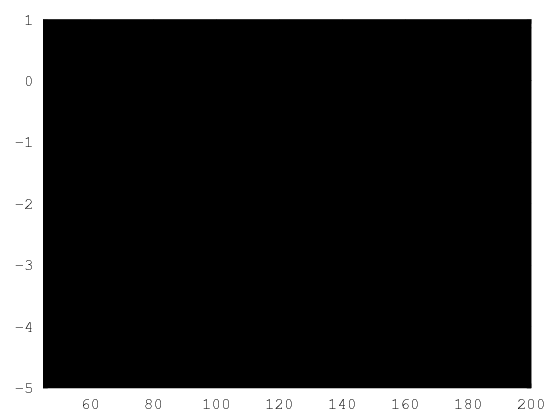

In [1]:
setdefaults
g=9.81; % acceleration due to gravity
m=linspace(50, 200,100); % possible values for mass 50 to 200 kg
c_d=0.25; % drag coefficient
t=4; % at time = 4 seconds
v=36; % speed must be 36 m/s
f_m = @(m) sqrt(g*m/c_d).*tanh(sqrt(g*c_d./m)*t)-v; % anonymous function f_m

plot(m,f_m(m),m,zeros(length(m),1))
axis([45 200 -5 1])

In [4]:
f_m(145)

ans =  0.045626


Brute force method is plot f_m vs m and with smaller and smaller steps until f_m ~ 0

Better methods are the 
1. Bracketing methods
2. Open methods

Both need an initial guess. 


## Incremental method (Brute force)

You know that for one value, m_lower, f_m is negative and for another value, m_upper, f_m is positive. 

In [ ]:
function xb = incsearch(func,xmin,xmax,ns)
% incsearch: incremental search root locator
%   xb = incsearch(func,xmin,xmax,ns):
%     finds brackets of x that contain sign changes
%     of a function on an interval
% input:
%   func = name of function
%   xmin, xmax = endpoints of interval
%   ns = number of subintervals (default = 50)
% output:
%   xb(k,1) is the lower bound of the kth sign change
%   xb(k,2) is the upper bound of the kth sign change
%   If no brackets found, xb = [].
if nargin < 3, error('at least 3 arguments required'), end
if nargin < 4, ns = 50; end %if ns blank set to 50
% Incremental search
x = linspace(xmin,xmax,ns);
f = func(x);
nb = 0; xb = []; %xb is null unless sign change detected
for k = 1:length(x)-1
  if sign(f(k)) ~= sign(f(k+1)) %check for sign change
    nb = nb + 1;
    xb(nb,1) = x(k);
    xb(nb,2) = x(k+1);
  end
end
if isempty(xb) %display that no brackets were found
  fprintf('no brackets found\n')
  fprintf('check interval or increase ns\n')
else
  fprintf('number of brackets: %i\n',nb) %display number of brackets
end

^C


In [3]:
incsearch(f_m,50,200)

number of brackets: 1
ans =

   141.84   144.90



In [4]:
incsearch(f_m,140, 150,100)

number of brackets: 1
ans =

   142.73   142.83



## Bisection method

Divide interval in half until error is reduced to some level

in previous example of freefall, choose x_l=50, x_u=200

x_r = (50+200)/2 = 125

f_m(125) = -0.408

x_r= (125+200)/2 = 162.5

f_m(162.5) = 0.3594

x_r = (125+162.5)/2=143.75

f_m(143.75)= 0.0206

In [13]:
x_l=125; x_u=143.75;
x_r=(x_l+x_u)/2
fprintf('interval left  f(x_l)= %1.1f,f(x_r)= %1.1f\n',f_m(x_l),f_m(x_r))
fprintf('interval right f(x_r)= %1.1f,f(x_u)= %1.1f\n',f_m(x_r),f_m(x_u))
f_m(x_r)

x_r =  134.38
interval left  f(x_l)= -0.4,f(x_r)= -0.2
interval right f(x_r)= -0.2,f(x_u)= 0.0
ans = -0.18060


## Bisect Function

Much better root locator, with 4 iterations, our function is already close to zero

Automate this with a function:
`bisect.m`

In [ ]:
function [root,fx,ea,iter]=bisect(func,xl,xu,es,maxit,varargin)
% bisect: root location zeroes
% [root,fx,ea,iter]=bisect(func,xl,xu,es,maxit,p1,p2,...):
% uses bisection method to find the root of func
% input:
% func = name of function
% xl, xu = lower and upper guesses
% es = desired relative error (default = 0.0001%)
% maxit = maximum allowable iterations (default = 50)
% p1,p2,... = additional parameters used by func
% output:
% root = real root
% fx = function value at root
% ea = approximate relative error (%)
% iter = number of iterations
if nargin<3,error('at least 3 input arguments required'),end
test = func(xl,varargin{:})*func(xu,varargin{:});
if test>0,error('no sign change'),end
if nargin<4|isempty(es), es=0.0001;end
if nargin<5|isempty(maxit), maxit=50;end
iter = 0; xr = xl; ea = 100;
while (1)
  xrold = xr;
  xr = (xl + xu)/2;
  iter = iter + 1;
  if xr ~= 0,ea = abs((xr - xrold)/xr) * 100;end
  test = func(xl,varargin{:})*func(xr,varargin{:});
  if test < 0
    xu = xr;
  elseif test > 0
    xl = xr;
  else
    ea = 0;
  end
  if ea <= es | iter >= maxit,break,end
end
root = xr; fx = func(xr, varargin{:});

^C


In [17]:
Mass_at_36ms=bisect(f_m,50,200)

Mass_at_36ms =  142.74


# Thanks

## False position (linear interpolation)

Rather than bisecting each bracket (1/2 each time) we can calculate the slope between the two points and update the xr position in this manner

$ x_{r} = x_{u} - \frac{f(x_{u})(x_{l}-x_{u})}{f(x_{l})-f(x_{u})}$

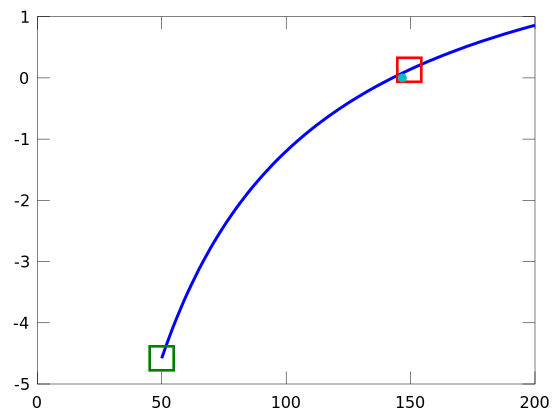

In [9]:
%xl=50; xu=200; 
xu=xr;
xl=xl;
xr=xu - (f_m(xu)*(xl-xu))/(f_m(xl)-f_m(xu));
plot(m,f_m(m),xl,f_m(xl),'s',xu,f_m(xu),'s',xr,0)

## False Position

Much better root locator, with 4 iterations, our function is already close to zero

Automate this with a function:
`falsepos.m`

In [ ]:
function [root,fx,ea,iter]=falsepos(func,xl,xu,es,maxit,varargin)
% falsepos: root location zeroes
% [root,fx,ea,iter]=bisect(func,xl,xu,es,maxit,p1,p2,...):
% uses false position method to find the root of func
% input:
% func = name of function
% xl, xu = lower and upper guesses
% es = desired relative error (default = 0.0001%)
% maxit = maximum allowable iterations (default = 50)
% p1,p2,... = additional parameters used by func
% output:
% root = real root
% fx = function value at root
% ea = approximate relative error (%)
% iter = number of iterations
if nargin<3,error('at least 3 input arguments required'),end
test = func(xl,varargin{:})*func(xu,varargin{:});
if test>0,error('no sign change'),end
if nargin<4|isempty(es), es=0.0001;end
if nargin<5|isempty(maxit), maxit=50;end
iter = 0; xr = xl; ea = 100;
while (1)
  xrold = xr;
  % xr = (xl + xu)/2; % bisect method
  xr=xu - (f_m(xu)*(xl-xu))/(f_m(xl)-f_m(xu)); % false position method
  iter = iter + 1;
  if xr ~= 0,ea = abs((xr - xrold)/xr) * 100;end
  test = func(xl,varargin{:})*func(xr,varargin{:});
  if test < 0
    xu = xr;
  elseif test > 0
    xl = xr;
  else
    ea = 0;
  end
  if ea <= es | iter >= maxit,break,end
end
root = xr; fx = func(xr, varargin{:});

^C
